In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import re
import os
import time
df = pd.read_csv("QB_Stats.csv")

In [276]:
df.Age

0       22.0
1       23.0
2       37.0
3       28.0
4       30.0
        ... 
3681    39.0
3682    24.0
3683    22.0
3684    36.0
3685    23.0
Name: Age, Length: 3686, dtype: float64

In [277]:
df.FantasyPoints

0       415.68
1       415.08
2       409.98
3       397.42
4       390.04
         ...  
3681     -7.28
3682     -7.28
3683     -7.44
3684     -8.28
3685    -10.74
Name: FantasyPoints, Length: 3686, dtype: float64

In [278]:
df.shape

(3686, 28)

In [256]:
df.columns = [c.replace(' ', '') for c in df.columns]

In [257]:
df.columns

Index(['Unnamed:0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [258]:
df.drop("Unnamed:0", axis = 1, inplace = True)

In [259]:
df.head()

,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,Int,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,Lamar Jackson,BAL,QB,22.0,15.0,15.0,265.0,401.0,3127.0,6.0,...,2.0,3127.0,36.0,401.0,1206.0,7.0,176.0,0.0,0.0,415.68
1,Patrick Mahomes,KAN,QB,23.0,16.0,16.0,383.0,580.0,5097.0,12.0,...,2.0,5097.0,50.0,580.0,272.0,2.0,60.0,0.0,0.0,415.08
2,Peyton Manning,DEN,QB,37.0,16.0,16.0,450.0,659.0,5477.0,10.0,...,6.0,5477.0,55.0,659.0,-31.0,1.0,32.0,0.0,0.0,409.98
3,Aaron Rodgers,GNB,QB,28.0,15.0,15.0,343.0,502.0,4643.0,6.0,...,0.0,4643.0,45.0,502.0,257.0,3.0,60.0,0.0,0.0,397.42
4,Tom Brady,NWE,QB,30.0,16.0,16.0,398.0,578.0,4806.0,8.0,...,4.0,4806.0,50.0,578.0,98.0,2.0,37.0,0.0,0.0,390.04


In [260]:
df.isnull().sum()

Player              0
Tm                  0
Pos                 0
Age                 0
G                   0
GS                  0
Cmp                 0
Att                 0
Yds                 0
Int                 0
Att.1               0
Yds.1               0
Tgt              1561
Rec                 0
Yds.2               0
Y/R                 0
Fumbles             0
FumblesLost         0
PassingYds          0
PassingTD           0
PassingAtt          0
RushingYds          0
RushingTD           0
RushingAtt          0
ReceivingYds        0
ReceivingTD         0
FantasyPoints       0
dtype: int64

In [261]:
counts_age = df["Age"].value_counts()
counts_age = counts_age.reset_index()
counts_age.columns = ["Age","Count"]
print(counts_age)

     Age  Count
0   24.0    398
1   25.0    380
2   26.0    355
3   27.0    315
4   28.0    296
5   23.0    292
6   29.0    251
7   30.0    227
8   31.0    210
9   32.0    189
10  33.0    152
11  34.0    130
12  22.0    116
13  35.0     92
14  36.0     80
15  37.0     69
16  38.0     54
17  39.0     32
18  40.0     19
19  21.0     11
20  41.0      7
21  42.0      5
22  44.0      3
23  43.0      3


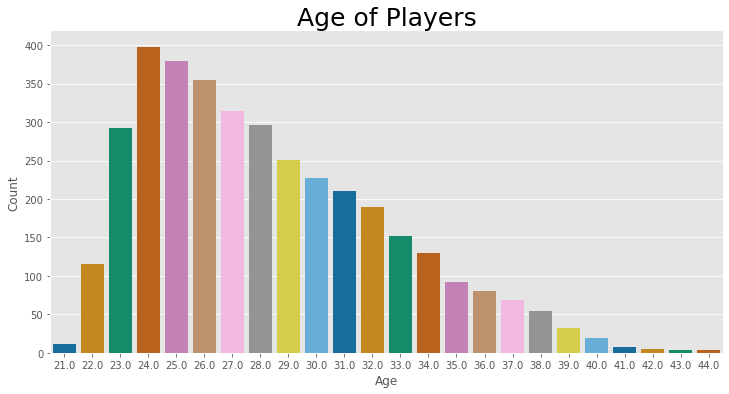

In [262]:
pt = sns.catplot(y = "Count",
            x = "Age", data = counts_age,
           palette="colorblind",height=5, aspect=2, kind="bar");
plt.style.use("ggplot")
plt.title("Age of Players",
          fontsize=25);

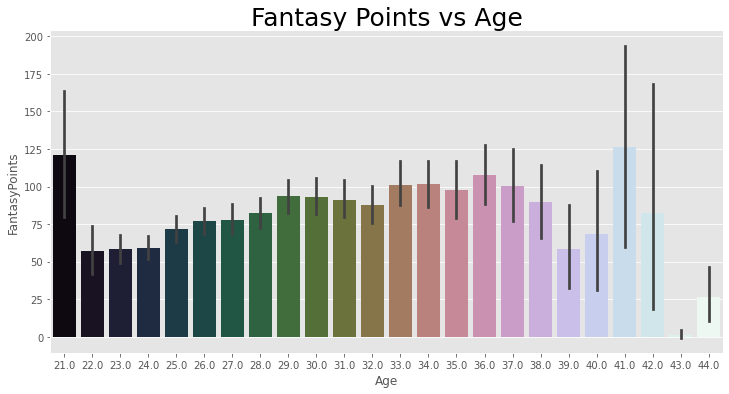

In [263]:
sns.catplot(x="Age", y="FantasyPoints", data=df,
            aspect=2, kind="bar", palette="cubehelix");
plt.style.use("ggplot")
plt.title("Fantasy Points vs Age",
          fontsize=25);

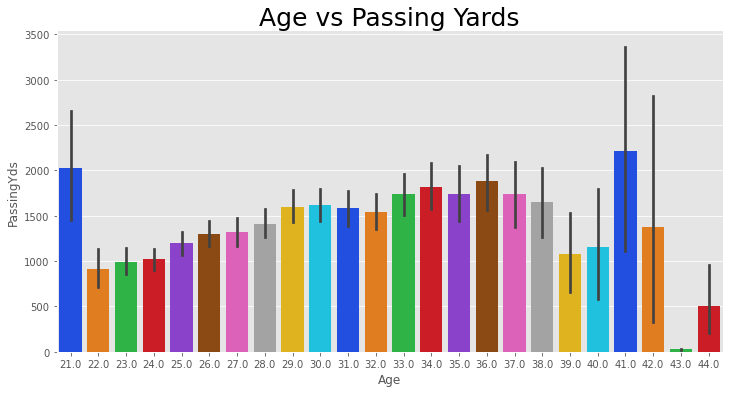

In [264]:
sns.catplot(x="Age", y="PassingYds", data=df, aspect=2, kind="bar",palette="bright");
plt.style.use("ggplot")
plt.title("Age vs Passing Yards",
          fontsize=25);

In [265]:
counts_PassTD = df["PassingTD"].value_counts()
counts_PassTD = counts_PassTD.reset_index()
counts_PassTD.columns= ["PassingTD","Counts"]
print(counts_PassTD)

    PassingTD  Counts
0         0.0     872
1         1.0     397
2         2.0     261
3         3.0     186
4         5.0     146
5         4.0     144
6         7.0     108
7         6.0     108
8        11.0     101
9         8.0      91
10        9.0      86
11       12.0      82
12       17.0      81
13       13.0      80
14       10.0      78
15       18.0      78
16       15.0      73
17       14.0      72
18       16.0      70
19       19.0      60
20       20.0      50
21       26.0      50
22       21.0      50
23       24.0      46
24       22.0      44
25       23.0      40
26       28.0      38
27       27.0      34
28       25.0      25
29       29.0      20
30       32.0      18
31       33.0      18
32       31.0      16
33       30.0      14
34       34.0       9
35       35.0       8
36       36.0       7
37       39.0       7
38       38.0       3
39       40.0       2
40       50.0       2
41       37.0       2
42       41.0       2
43       45.0       1
44       4

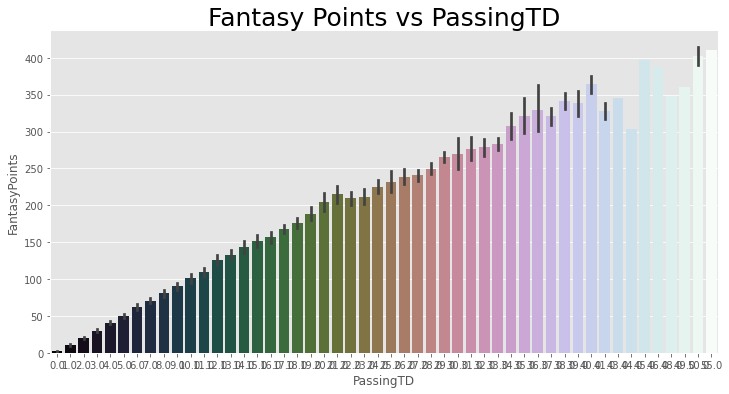

In [266]:
sns.catplot(x="PassingTD", y="FantasyPoints", data=df,
            aspect=2, kind="bar", palette="cubehelix");
plt.style.use("ggplot")
plt.title("Fantasy Points vs PassingTD",
          fontsize=25);

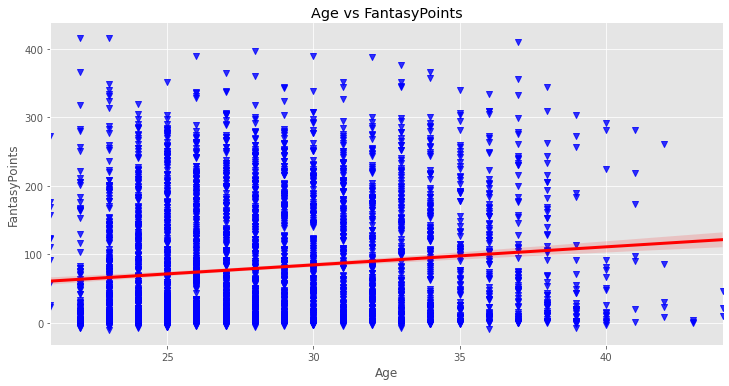

In [267]:
sns.lmplot(x="Age", y="FantasyPoints",data=df,markers="v",
            scatter_kws={"color": "blue"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Age vs FantasyPoints");

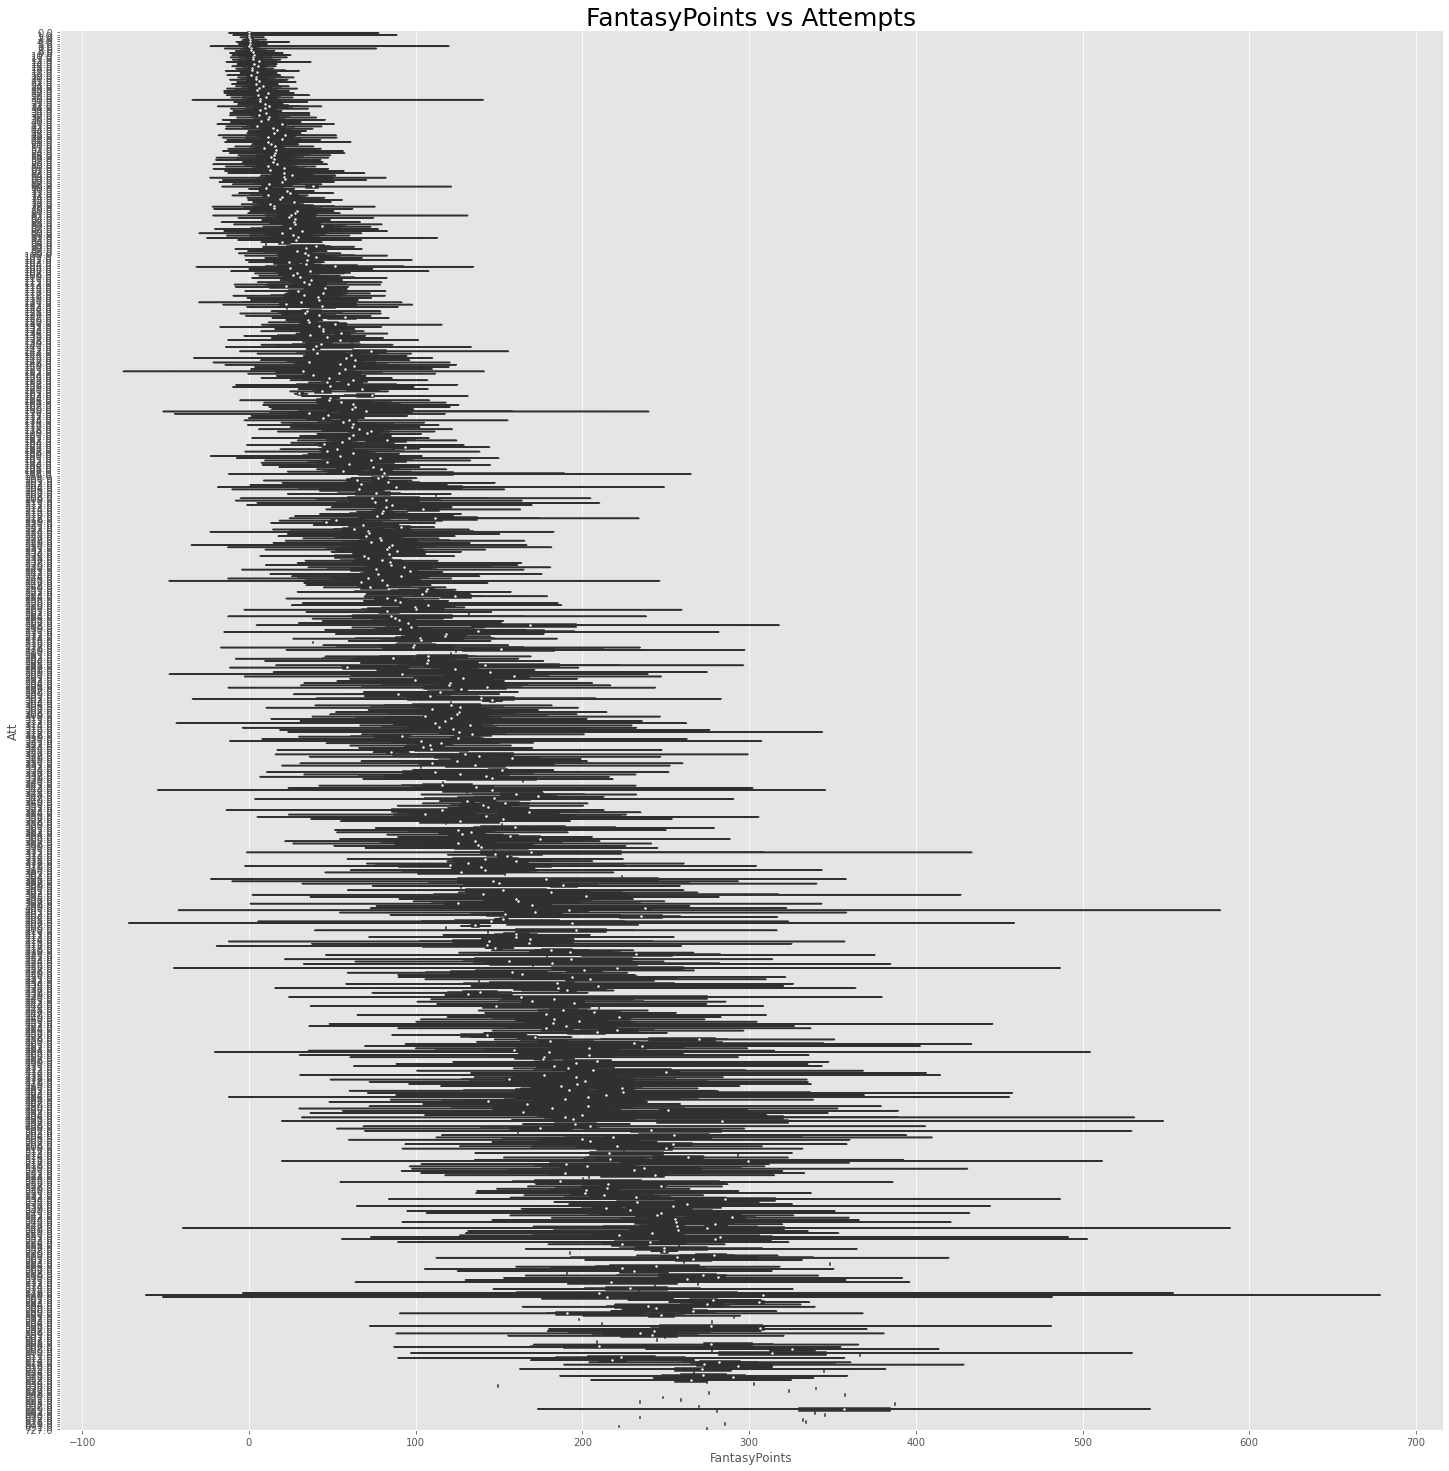

In [300]:
sns.catplot(x="FantasyPoints", y="Att",data=df,
            orient="h",
            kind="violin",height=20,palette="colorblind");
plt.title("FantasyPoints vs Attempts", fontsize=25);